**Kaggle 1st Project: Titanic Machine Learning From Disaster**

**The Problem Statement**

Find out what sort of people survive.
Predict which passengers survived the tragedy.

**Step 1: Collection of Data** 

> Training and Testing Data are available on Kaggle

**Loading train,test and gender_submission dataset**

In [1]:
import pandas as pd
import numpy as np

train = pd.read_csv('data/train.csv')
test = pd.read_csv('data/test.csv')
gender_submission = pd.read_csv('data/gender_submission.csv')

**Step 2: Exploratory Data Analysis (EDA)**

> Printing values in the dataset

In [2]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


**Data Description**

> Survived: 0 = No, 1 = Yes

> pclass(Ticket Class): 1 = 1st class, 2 = 2nd Class, 3 = 3rd Class

> Sex: M = Male, F = Female

> Age: Age in years

> Sibsp: number of siblings/spouses aboard the Titanic

> Parch: number of siblings/spouses aboard the Titanic

> Ticket: Ticket Number

> Fare: Passenger Fare

> Cabin: Cabin Number

> Embarked: Port of Embarkation, C = Cherbourg, Q = Queenstown, S = Southampton



**Total number of rows and columns**


There are 891 rows and 12 columns in our training dataset

In [3]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [4]:
train.shape

(891, 12)

In [5]:
test.shape

(418, 11)

In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [7]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


We can see that Age value is missing for many rows.

Out of 891 rows, the Age value is present only in 714 rows.

Similarly, Cabin values are also missing in many rows. Only 204 out of 891 rows have cabin values.

In [8]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

There are 177 rows with the missing Age, 687 rows with missing Cabin and 2 rows with missing Embarked information.

**Import Python Lib For Visualization**

In [9]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set() # setting seaborn default for plots

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


**Let's Draw Bar Chart For Categorical Features**

1. Pclass
2. Sex
3. SibSp (Number of siblings and spouses)
4. Parch (Number of parents and children)
5. Embarked
6. Cabin

In [10]:
def bar_chart(feature):
  survived = train[train['Survived'] == 1][feature].value_counts()
  dead = train[train['Survived'] == 0][feature].value_counts()
  df = pd.DataFrame([survived, dead])
  df.index = ['Survived','Dead']
  df.plot(kind='bar', stacked = True, figsize = (10,5))

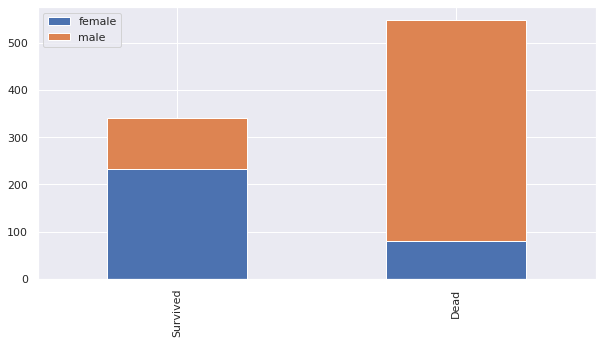

In [11]:
bar_chart('Sex')

The above chart confirm **Women** more likely survived than **Men**.

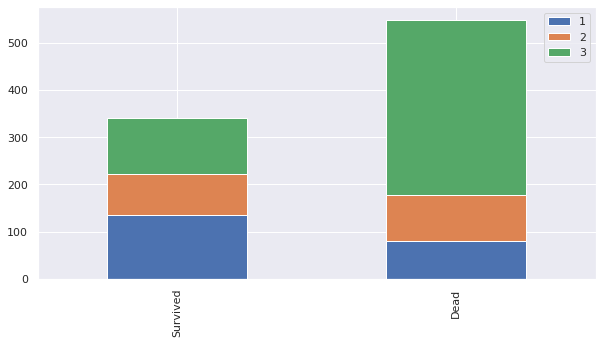

In [12]:
bar_chart('Pclass')

The above chart confirms that
1. 1st class more likely survived than other classes
2. 3rd class more likely dead than other classes

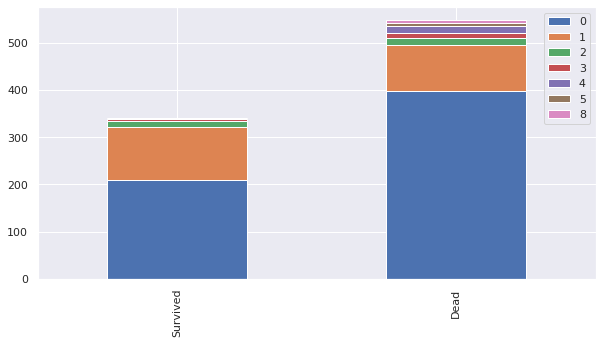

In [13]:
bar_chart('SibSp')

The Chart confirms **a person aboarded with more than 2 siblings or spouse** more likely survived

The Chart confirms **a person aboarded without siblings or spouse** more likely dead

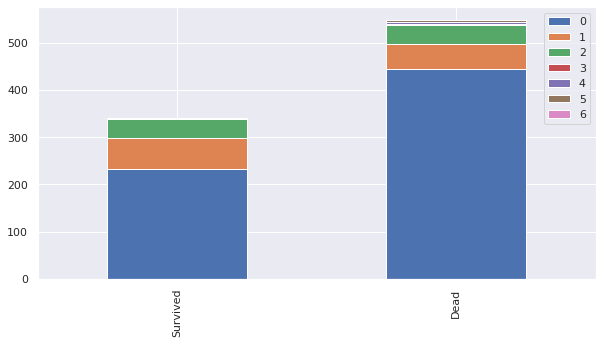

In [14]:

bar_chart('Parch')

The Chart confirms **a person aboarded with more than 2 parents or children** more likely survived.

The Chart confirms **a person aboarded alone** more likely dead

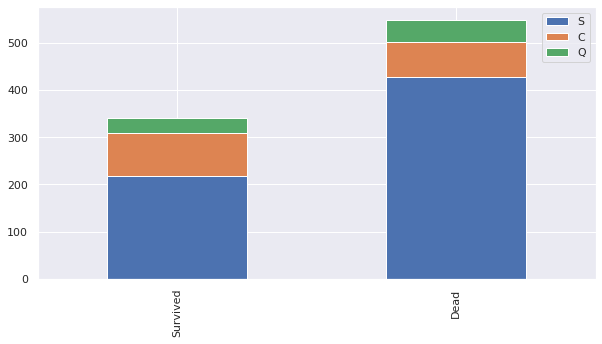

In [15]:
bar_chart('Embarked')

The Chart confirms **a person aboarded from C** slightly more likely survived

The Chart confirms **a person aboarded from Q** more likely dead

The Chart confirms **a person aboarded from S** more likely dead

**Step 3: Feature Engineering**

Feature engineering is the process of using domain knowledge of the data to create features (**feature vectors**) that make machine learning algorithms work.

**Feature vector** is an n-dimensional vector of numerical features that represent some object. Many algorithms in Machine Learning require a numerical representation of the objects, since such representations facilitate processing and statistical analysis.  

In [16]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [17]:
# Creating subset dataframes for the training set and testing set
# Training DataFrame
df_train = pd.DataFrame()
# Testing DataFrame
df_test = pd.DataFrame()

In [18]:
# Adding Survived and Pclass column into subset dataframe
df_train = train
df_test = test

In [19]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


**Step 3.1: Name**

We can classify the Name on the basis of **Designation**

For example: Mr., Mrs. etc

In [20]:
train.Name.head()

0                              Braund, Mr. Owen Harris
1    Cumings, Mrs. John Bradley (Florence Briggs Th...
2                               Heikkinen, Miss. Laina
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                             Allen, Mr. William Henry
Name: Name, dtype: object

**Title Mapping**

Mr : 0, Mrs. : 1, Master : 2, Miss : 3, Others : 4

In [21]:
df_train.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [22]:
train_test_data = [df_train, df_test]

for dataset in train_test_data:
  dataset['Name'] = dataset['Name'].str.extract('([A-Za-z]+)\.', expand = False)

df_train['Name'].value_counts()

Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Col           2
Mlle          2
Major         2
Sir           1
Ms            1
Countess      1
Lady          1
Mme           1
Don           1
Jonkheer      1
Capt          1
Name: Name, dtype: int64

In [23]:
title_mapping = {'Mr': 0, 'Mrs': 1, 'Master': 2, 'Miss': 3, 'Dr': 4, 'Rev': 4, 'Col': 4, 'Major': 4, 'Mlle': 4, 'Countess': 4,
                 'Ms': 4, 'Lady': 4, 'Jonkheer': 4, 'Don': 4, 'Dona': 4, 'Mme': 4, 'Capt': 4, 'Sir': 4}
for dataset in train_test_data:
  dataset['Name'] = dataset['Name'].map(title_mapping)

In [24]:
df_train.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,0,male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,1,female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,1,female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,0,male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,0,male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,0,male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,2,male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,1,female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,1,female,14.0,1,0,237736,30.0708,NaN,C


In [25]:
train.Name.dtypes

dtype('int64')

In [26]:
test.Name.dtypes

dtype('int64')

In [27]:
df_test.Name.head()

0    0
1    1
2    0
3    0
4    1
Name: Name, dtype: int64

In [28]:
# How many values are there
df_train.Name.value_counts()

0    517
3    182
1    125
2     40
4     27
Name: Name, dtype: int64

In [29]:
df_test.Name.value_counts()

0    240
3     78
1     72
2     21
4      7
Name: Name, dtype: int64

In [30]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,0,male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,1,female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,1,female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,0,male,35.0,0,0,373450,8.0500,NaN,S


In [31]:
df_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,0,male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,1,female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,0,male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,0,male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,1,female,22.0,1,1,3101298,12.2875,NaN,S


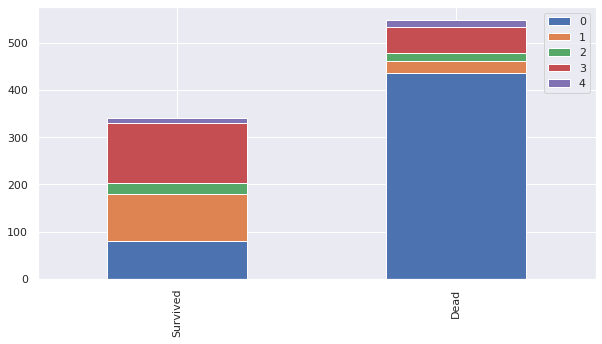

In [32]:
bar_chart('Name')

**Step 3.2: Sex**

Male = 0; Female = 1

In [33]:

sex_mapping = {"male": 0, "female": 1}
df_train['Sex'] = df_train['Sex'].map(sex_mapping)
df_test['Sex'] = df_test['Sex'].map(sex_mapping)

In [34]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,0,0,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,1,1,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,3,1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,1,1,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,0,0,35.0,0,0,373450,8.0500,NaN,S


In [35]:
df_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,0,0,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,1,1,47.0,1,0,363272,7.0000,NaN,S
2,894,2,0,0,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,0,0,27.0,0,0,315154,8.6625,NaN,S
4,896,3,1,1,22.0,1,1,3101298,12.2875,NaN,S


**Step 3.3: Age**

> There are missing Ages in the column

> Let's fill in the Ages with the median of ages corresponding to similar Title 

In [36]:
df_train.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,0,0,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,1,1,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,3,1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,1,1,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,0,0,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,0,0,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,0,0,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,2,0,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,1,1,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,1,1,14.0,1,0,237736,30.0708,NaN,C


In [37]:
# filling missing age with the median age for each title (Mr. , Mrs., Master., Miss., Others)
df_train['Age'].fillna(df_train.groupby('Name')['Age'].transform('median'), inplace = True)
df_test['Age'].fillna(df_test.groupby('Name')['Age'].transform('median'), inplace = True)

In [38]:
df_train['Age'].head(10)

0    22.0
1    38.0
2    26.0
3    35.0
4    35.0
5    30.0
6    54.0
7     2.0
8    27.0
9    14.0
Name: Age, dtype: float64

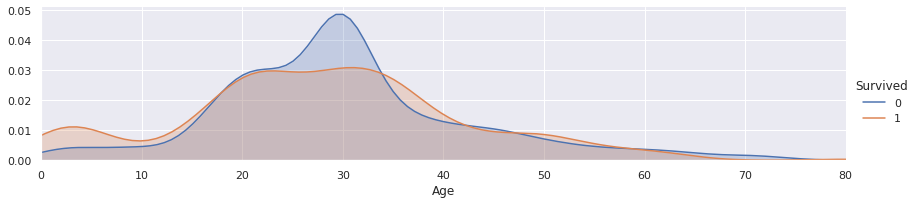

In [39]:
facet = sns.FacetGrid(df_train, hue='Survived', aspect = 4)
facet.map(sns.kdeplot,'Age', shade = True)
facet.set(xlim=(0, df_train['Age'].max()))
facet.add_legend()

plt.show()

(0.0, 20.0)

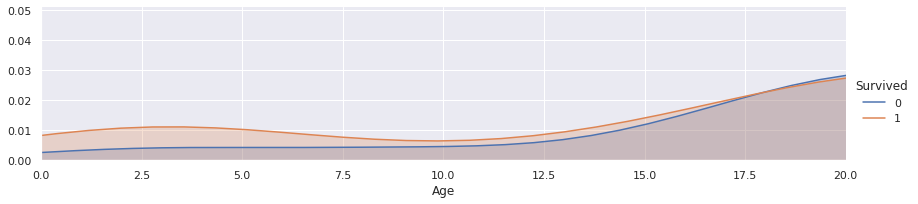

In [40]:
facet = sns.FacetGrid(df_train, hue='Survived', aspect = 4)
facet.map(sns.kdeplot,'Age', shade = True)
facet.set(xlim=(0, df_train['Age'].max()))
facet.add_legend()

plt.xlim(0,20)

(30.0, 40.0)

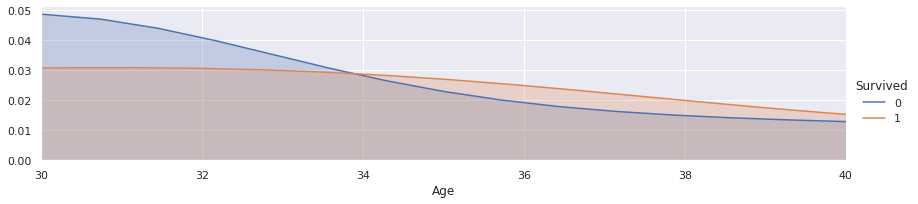

In [41]:
facet = sns.FacetGrid(df_train, hue='Survived', aspect = 4)
facet.map(sns.kdeplot,'Age', shade = True)
facet.set(xlim=(0, df_train['Age'].max()))
facet.add_legend()

plt.xlim(30,40)

(40.0, 60.0)

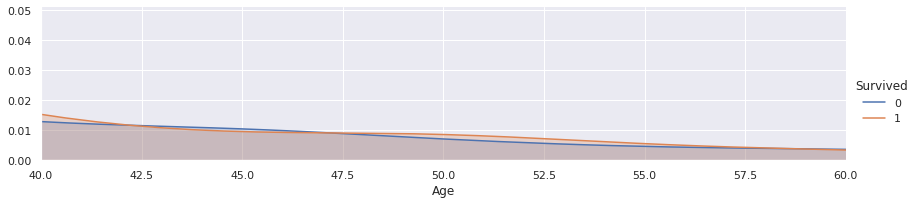

In [42]:
facet = sns.FacetGrid(df_train, hue='Survived', aspect = 4)
facet.map(sns.kdeplot,'Age', shade = True)
facet.set(xlim=(0, df_train['Age'].max()))
facet.add_legend()

plt.xlim(40,60)

(60.0, 80.0)

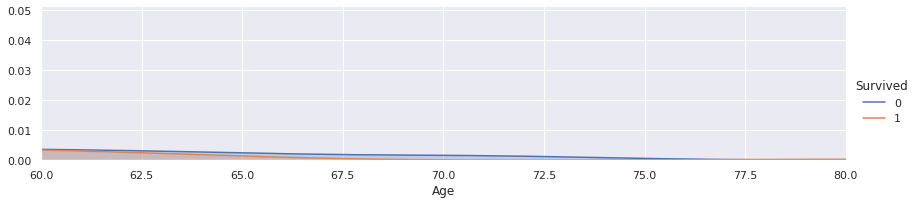

In [43]:
facet = sns.FacetGrid(df_train, hue='Survived', aspect = 4)
facet.map(sns.kdeplot,'Age', shade = True)
facet.set(xlim=(0, df_train['Age'].max()))
facet.add_legend()

plt.xlim(60)

In [44]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    int64  
 4   Sex          891 non-null    int64  
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(7), object(3)
memory usage: 83.7+ KB


In [45]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,0,0,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,1,1,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,3,1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,1,1,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,0,0,35.0,0,0,373450,8.0500,NaN,S


In [46]:
df_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,0,0,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,1,1,47.0,1,0,363272,7.0000,NaN,S
2,894,2,0,0,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,0,0,27.0,0,0,315154,8.6625,NaN,S
4,896,3,1,1,22.0,1,1,3101298,12.2875,NaN,S


In [47]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    int64  
 4   Sex          891 non-null    int64  
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(7), object(3)
memory usage: 83.7+ KB


**Step 3.3.1: Bining**

>Bining/ Conveting Numerical Age to Categorical Variable

**Feature Vector Map**: Child: 0, Young: 1, Adult: 2, Mid-Age: 3, Senior: 4

In [48]:
for dataset in train_test_data:
  dataset.loc[dataset['Age'] <= 16, 'Age'] = 0,
  dataset.loc[(dataset['Age'] > 16) & (dataset['Age'] <= 26), 'Age'] = 1,
  dataset.loc[(dataset['Age'] > 26) & (dataset['Age'] <= 36), 'Age'] = 2,
  dataset.loc[(dataset['Age'] > 36) & (dataset['Age'] <= 62), 'Age'] = 3,
  dataset.loc[dataset['Age'] > 62, 'Age'] = 4

In [49]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,0,0,1.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,1,1,3.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,3,1,1.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,1,1,2.0,1,0,113803,53.1000,C123,S
4,5,0,3,0,0,2.0,0,0,373450,8.0500,NaN,S


In [50]:
df_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,0,0,2.0,0,0,330911,7.8292,NaN,Q
1,893,3,1,1,3.0,1,0,363272,7.0000,NaN,S
2,894,2,0,0,3.0,0,0,240276,9.6875,NaN,Q
3,895,3,0,0,2.0,0,0,315154,8.6625,NaN,S
4,896,3,1,1,1.0,1,1,3101298,12.2875,NaN,S


**Step 3.4: Embarked**

> Filling missing values


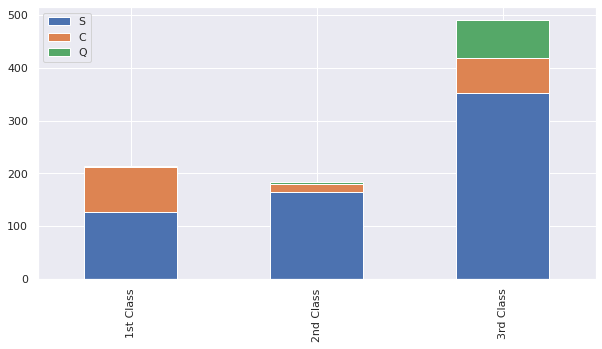

In [51]:
# filling missing values of Embarked by corresponding Pclass
# Lets see first from where did more people embarked from
Pclass1 = df_train[df_train['Pclass'] == 1]['Embarked'].value_counts()
Pclass2 = df_train[df_train['Pclass'] == 2]['Embarked'].value_counts()
Pclass3 = df_train[df_train['Pclass'] == 3]['Embarked'].value_counts()
df = pd.DataFrame([Pclass1, Pclass2, Pclass3])
df.index = ['1st Class', '2nd Class', '3rd Class']
df.plot(kind='bar', stacked = True, figsize = (10,5))

more than 50% of 1st class are from S embark

more than 50% of 2nd class are from S embark

more than 50% of 3rd class are from S embark

In [52]:
# filling missing values with S embark
for dataset in train_test_data:
  dataset['Embarked'] = dataset['Embarked'].fillna('S')

In [53]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,0,0,1.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,1,1,3.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,3,1,1.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,1,1,2.0,1,0,113803,53.1000,C123,S
4,5,0,3,0,0,2.0,0,0,373450,8.0500,NaN,S


In [54]:
embarked_mapping = {'S': 0, 'C': 1, 'Q': 2}
for dataset in train_test_data:
  dataset['Embarked'] = dataset['Embarked'].map(embarked_mapping)

In [55]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,0,0,1.0,1,0,A/5 21171,7.2500,NaN,0
1,2,1,1,1,1,3.0,1,0,PC 17599,71.2833,C85,1
2,3,1,3,3,1,1.0,0,0,STON/O2. 3101282,7.9250,NaN,0
3,4,1,1,1,1,2.0,1,0,113803,53.1000,C123,0
4,5,0,3,0,0,2.0,0,0,373450,8.0500,NaN,0


In [56]:
df_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,0,0,2.0,0,0,330911,7.8292,NaN,2
1,893,3,1,1,3.0,1,0,363272,7.0000,NaN,0
2,894,2,0,0,3.0,0,0,240276,9.6875,NaN,2
3,895,3,0,0,2.0,0,0,315154,8.6625,NaN,0
4,896,3,1,1,1.0,1,1,3101298,12.2875,NaN,0


**Step 3.5: Fare**


In [57]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    int64  
 4   Sex          891 non-null    int64  
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     891 non-null    int64  
dtypes: float64(2), int64(8), object(2)
memory usage: 83.7+ KB


In [58]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    int64  
 3   Sex          418 non-null    int64  
 4   Age          418 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    int64  
dtypes: float64(2), int64(7), object(2)
memory usage: 36.0+ KB


In [59]:
# filling missing values with median fare for each Pclass 
df_train['Fare'].fillna(df_train.groupby('Pclass')['Fare'].transform('median'), inplace = True)
df_test['Fare'].fillna(df_test.groupby('Pclass')['Fare'].transform('median'), inplace = True)

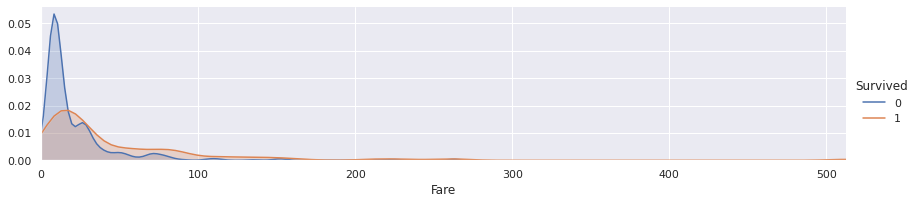

In [60]:
facet = sns.FacetGrid(df_train, hue='Survived', aspect = 4)
facet.map(sns.kdeplot,'Fare', shade = True)
facet.set(xlim=(0, df_train['Fare'].max()))
facet.add_legend()

plt.show()

(0.0, 20.0)

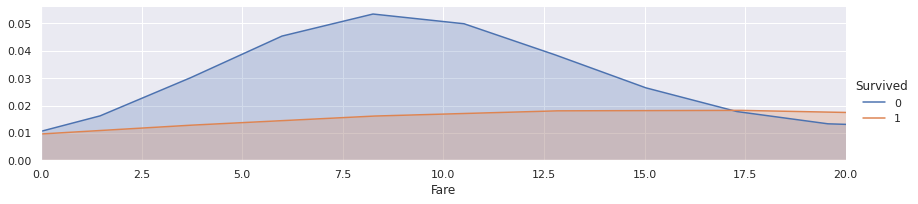

In [61]:
facet = sns.FacetGrid(df_train, hue='Survived', aspect = 4)
facet.map(sns.kdeplot,'Fare', shade = True)
facet.set(xlim=(0, df_train['Fare'].max()))
facet.add_legend()

plt.xlim(0, 20)

(0.0, 30.0)

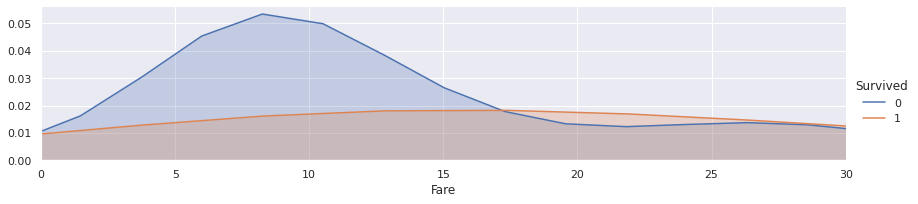

In [62]:
facet = sns.FacetGrid(df_train, hue='Survived', aspect = 4)
facet.map(sns.kdeplot,'Fare', shade = True)
facet.set(xlim=(0, df_train['Fare'].max()))
facet.add_legend()

plt.xlim(0, 30)

In [63]:
for dataset in train_test_data:
  dataset.loc[dataset['Fare'] <= 17, 'Fare'] = 0,
  dataset.loc[(dataset['Fare'] > 17) & (dataset['Fare'] <= 30), 'Fare'] = 1,
  dataset.loc[(dataset['Fare'] > 30) & (dataset['Fare'] <= 100), 'Fare'] = 2,
  dataset.loc[dataset['Fare'] > 100, 'Fare'] = 4

In [64]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,0,0,1.0,1,0,A/5 21171,0.0,NaN,0
1,2,1,1,1,1,3.0,1,0,PC 17599,2.0,C85,1
2,3,1,3,3,1,1.0,0,0,STON/O2. 3101282,0.0,NaN,0
3,4,1,1,1,1,2.0,1,0,113803,2.0,C123,0
4,5,0,3,0,0,2.0,0,0,373450,0.0,NaN,0


**Step 3.6: Cabin**


In [65]:
df_train.Cabin.value_counts()

C23 C25 C27    4
G6             4
B96 B98        4
F2             3
C22 C26        3
              ..
A23            1
A32            1
E58            1
D30            1
B19            1
Name: Cabin, Length: 147, dtype: int64

In [66]:
for dataset in train_test_data:
  dataset['Cabin'] = dataset['Cabin'].str[:1]

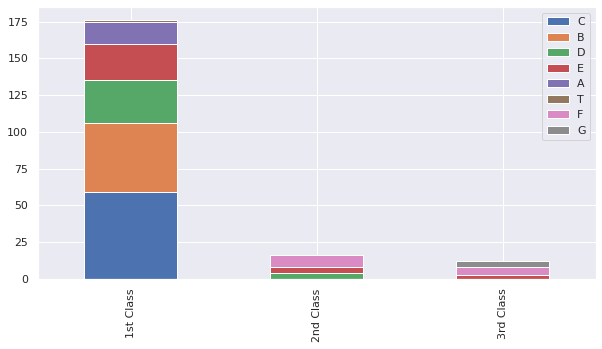

In [67]:
Pclass1 = df_train[df_train['Pclass'] == 1]['Cabin'].value_counts()
Pclass2 = df_train[df_train['Pclass'] == 2]['Cabin'].value_counts()
Pclass3 = df_train[df_train['Pclass'] == 3]['Cabin'].value_counts()
df = pd.DataFrame([Pclass1, Pclass2, Pclass3])
df.index = ['1st Class', '2nd Class', '3rd Class']
df.plot(kind='bar', stacked = True, figsize = (10,5))

In [68]:
# I have kept the binning in range from 0 to 3 since it will help in modelling
cabin_mapping = {'A': 0, 'B': 0.4, 'C': 0.8, 'D': 1.2, 'E': 1.6, 'F': 2.0, 'G': 2.4, 'T': 2.8}
for dataset in train_test_data:
  dataset['Cabin'] = dataset['Cabin'].map(cabin_mapping)

In [69]:
# filling missing values with median fare for each Pclass 
df_train['Cabin'].fillna(df_train.groupby('Pclass')['Cabin'].transform('median'), inplace = True)
df_test['Cabin'].fillna(df_test.groupby('Pclass')['Cabin'].transform('median'), inplace = True)

**Step 3.7: Family Size**

In [70]:
df_train['FamilySize'] = df_train['SibSp'] + df_train['Parch'] + 1
df_test['FamilySize'] = df_test['SibSp'] + df_test['Parch'] + 1

(0.0, 11.0)

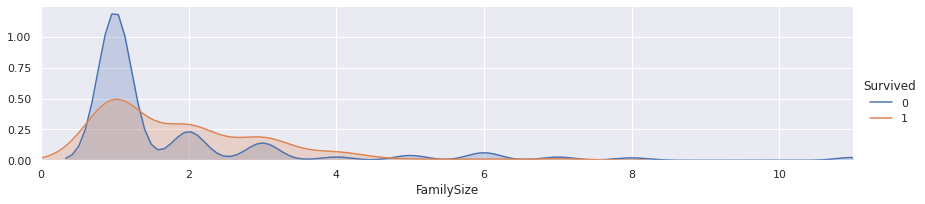

In [71]:
facet = sns.FacetGrid(df_train, hue='Survived', aspect = 4)
facet.map(sns.kdeplot,'FamilySize', shade = True)
facet.set(xlim=(0, df_train['FamilySize'].max()))
facet.add_legend()

plt.xlim(0)

In [72]:
family_mapping = {1: 0, 2: 0.4, 3: 0.8, 4: 1.2, 5: 1.6, 6: 2.0, 7: 2.4, 8: 2.8, 9: 3.2, 10: 3.6, 11: 4}
for dataset in train_test_data:
  dataset['FamilySize'] = dataset['FamilySize'].map(family_mapping)

In [73]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize
0,1,0,3,0,0,1.0,1,0,A/5 21171,0.0,2.0,0,0.4
1,2,1,1,1,1,3.0,1,0,PC 17599,2.0,0.8,1,0.4
2,3,1,3,3,1,1.0,0,0,STON/O2. 3101282,0.0,2.0,0,0.0
3,4,1,1,1,1,2.0,1,0,113803,2.0,0.8,0,0.4
4,5,0,3,0,0,2.0,0,0,373450,0.0,2.0,0,0.0


In [74]:
df_train = df_train.drop(['PassengerId'], axis=1)

In [75]:
df_train = df_train.drop(['Ticket'], axis=1)
df_train = df_train.drop(['Parch'], axis=1)
df_train = df_train.drop(['SibSp'], axis=1)
df_test = df_test.drop(['Ticket'], axis=1)
df_test = df_test.drop(['Parch'], axis=1)
df_test = df_test.drop(['SibSp'], axis=1)

In [76]:
df_train.head()

,Survived,Pclass,Name,Sex,Age,Fare,Cabin,Embarked,FamilySize
0,0,3,0,0,1.0,0.0,2.0,0,0.4
1,1,1,1,1,3.0,2.0,0.8,1,0.4
2,1,3,3,1,1.0,0.0,2.0,0,0.0
3,1,1,1,1,2.0,2.0,0.8,0,0.4
4,0,3,0,0,2.0,0.0,2.0,0,0.0


In [77]:
df_test.head()

,PassengerId,Pclass,Name,Sex,Age,Fare,Cabin,Embarked,FamilySize
0,892,3,0,0,2.0,0.0,2.0,2,0.0
1,893,3,1,1,3.0,0.0,2.0,0,0.4
2,894,2,0,0,3.0,0.0,2.0,2,0.0
3,895,3,0,0,2.0,0.0,2.0,0,0.0
4,896,3,1,1,1.0,0.0,2.0,0,0.8


In [78]:
# training data without survived column
df_train_data = df_train.drop('Survived', axis = 1)
target = df_train['Survived']

df_train_data.shape, target.shape

((891, 8), (891,))

In [79]:
df_train_data.head()

,Pclass,Name,Sex,Age,Fare,Cabin,Embarked,FamilySize
0,3,0,0,1.0,0.0,2.0,0,0.4
1,1,1,1,3.0,2.0,0.8,1,0.4
2,3,3,1,1.0,0.0,2.0,0,0.0
3,1,1,1,2.0,2.0,0.8,0,0.4
4,3,0,0,2.0,0.0,2.0,0,0.0


In [80]:
df_train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Pclass      891 non-null    int64  
 1   Name        891 non-null    int64  
 2   Sex         891 non-null    int64  
 3   Age         891 non-null    float64
 4   Fare        891 non-null    float64
 5   Cabin       891 non-null    float64
 6   Embarked    891 non-null    int64  
 7   FamilySize  891 non-null    float64
dtypes: float64(4), int64(4)
memory usage: 55.8 KB


In [81]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    int64  
 3   Sex          418 non-null    int64  
 4   Age          418 non-null    float64
 5   Fare         418 non-null    float64
 6   Cabin        418 non-null    float64
 7   Embarked     418 non-null    int64  
 8   FamilySize   418 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 29.5 KB


**Step 4: Modelling**

In [82]:
# Importing Classifier Modules
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

import numpy as np

In [83]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Survived    891 non-null    int64  
 1   Pclass      891 non-null    int64  
 2   Name        891 non-null    int64  
 3   Sex         891 non-null    int64  
 4   Age         891 non-null    float64
 5   Fare        891 non-null    float64
 6   Cabin       891 non-null    float64
 7   Embarked    891 non-null    int64  
 8   FamilySize  891 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 62.8 KB


**Step 4.2: Cross Validation**

In [84]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
k_fold = KFold(n_splits = 10, shuffle=True, random_state=0)

**Step 4.2.1: KNN**

In [86]:
clf = KNeighborsClassifier(n_neighbors=13)
scoring = 'accuracy'
score = cross_val_score(clf, df_train_data, target, cv=k_fold, n_jobs=1, scoring=scoring)
print(score)

[0.8        0.79775281 0.82022472 0.82022472 0.83146067 0.78651685
 0.82022472 0.79775281 0.84269663 0.80898876]


In [87]:
# KNN Score
round(np.mean(score)*100,2)

81.26

**Step 4.2.2: Decision Tree**

In [88]:
clf = DecisionTreeClassifier()
scoring = 'accuracy'
score = cross_val_score(clf, df_train_data, target, cv=k_fold, n_jobs=1, scoring=scoring)
print(score)

[0.76666667 0.83146067 0.7752809  0.7752809  0.87640449 0.76404494
 0.82022472 0.82022472 0.73033708 0.79775281]


In [89]:
# Decision Tree Score
round(np.mean(score)*100,2) 

79.58

**Step 4.2.3: Random Forest**

In [90]:
clf = RandomForestClassifier(n_estimators=13)
scoring = 'accuracy'
score = cross_val_score(clf, df_train_data, target, cv=k_fold, n_jobs=1, scoring=scoring)
print(score)

[0.81111111 0.84269663 0.83146067 0.78651685 0.87640449 0.7752809
 0.83146067 0.80898876 0.75280899 0.83146067]


In [91]:
# Random Forest Score
round(np.mean(score)*100,2)

81.48

**Step 4.2.4: Navie Bayes**

In [92]:
clf = GaussianNB()
scoring = 'accuracy'
score = cross_val_score(clf, df_train_data, target, cv=k_fold, n_jobs=1, scoring=scoring)
print(score)

[0.81111111 0.73033708 0.74157303 0.69662921 0.68539326 0.79775281
 0.70786517 0.78651685 0.83146067 0.76404494]


In [93]:
# Naive Bayes Score
round(np.mean(score)*100,2)

75.53

**Step 4.2.5 SVM**

In [94]:
clf = SVC()
scoring = 'accuracy'
score = cross_val_score(clf, df_train_data, target, cv=k_fold, n_jobs=1, scoring=scoring)
print(score)

[0.84444444 0.82022472 0.80898876 0.80898876 0.84269663 0.82022472
 0.83146067 0.84269663 0.84269663 0.87640449]


In [95]:
# SVM Score
round(np.mean(score)*100,2)

83.39

**Step 5: Testing**

In [98]:
df_test_data = df_test.drop('PassengerId', axis=1).copy()
df_test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Pclass      418 non-null    int64  
 1   Name        418 non-null    int64  
 2   Sex         418 non-null    int64  
 3   Age         418 non-null    float64
 4   Fare        418 non-null    float64
 5   Cabin       418 non-null    float64
 6   Embarked    418 non-null    int64  
 7   FamilySize  418 non-null    float64
dtypes: float64(4), int64(4)
memory usage: 26.2 KB


In [99]:
clf = SVC()
clf.fit(df_train_data,target)

prediction = clf.predict(df_test_data)

In [100]:
submission = pd.DataFrame({'PassengerId':test.PassengerId,
                           'Survived': prediction})
submission.to_csv('submission.csv', index=False)

In [101]:
submission = pd.read_csv('submission.csv')
submission.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
